#Shapely for GIS

`Shapely` is a planar geometry package) developed by the [Toblerity](http://toblerity.org/) Project. The Toblerity Project is a community of python developers working on open source tools for spatial data manipulation. Right now they focus primarily on spatial data manipulation in python. The project has significant contributions from [Sean Gilles](http://sgillies.net/) and [Mike Toews](https://sites.google.com/site/mwtoews/). I'll show you how to exmaine projects for main contributors now, using [`Pandas`](https://github.com/pydata/pandas).

As far as `Shapely` is concerned, "planar" means that it can process any kind of spatial information that can be embedded in a plane. For us, this means that shapely processes vector data, and requires that the vector data be on one-level.

For most of you, this isn't a problem. But, if you want to do GIS operations on a street network, where overpasses mean that two lines touch without an intersection, this may get problematic. 

Most of you will work with only a few `shapely` submodules, and not directly with the library itself. To do this, we'll import those submodules directly.

In [1]:
import shapely.geometry as geom
import shapely.ops as geoproc
import numpy
import pysal
import pandas

Using our GeoPandas-like function we made yesterday (in notebook `PySAL`), let's build some data frames

In [2]:
def geodf(fpath):
    fp_shp = pysal.open(fpath + '.shp')
    fp_dbf = pysal.open(fpath + '.dbf') 
    df = pandas.DataFrame({field: fp_dbf.by_col(field) for field in fp_dbf.header})
    df['shapes'] = pandas.Series(geom.shape(poly) for poly in fp_shp)
    return df

Now, we'll use this function to open up four datasets. The first is the Sacramento employment data we dicussed earlier. Then, we'll also open up a list of schools, wild lands, and the boundaries of Sacramento city itself. *This data is not offically collected :)*

In [3]:
social =  geodf(pysal.examples.get_path('sacramentot2'))
schools = geodf('./sacramento/schools')
wilds = geodf('./sacramento/wilds')
boundaries = geodf('./sacramento/bounds')

Just to be sure, let's look at the new dataframes:

In [4]:
social.head()

,ASIAN_,BLACK_,EMP16_2,EMPL16,EMP_29,EMP_30,EMP_AWAY,EMP_FEM,EMP_HOME,EMP_MALE,...,OCC_MAN,OCC_OFF1,POLYID,POP_16,POP_65,POV_POP,POV_TOT,TOT_POP,WHITE_,shapes
0,82,29,2972,2889,1573,1033,2606,1187,283,1785,...,117,663,1,1077,518,5461,470,5501,4961,"POLYGON ((-120.217504 39.162085, -120.220064 3..."
1,28,0,1175,1151,908,159,1067,522,84,653,...,38,229,2,396,109,2052,160,2072,1603,"POLYGON ((-120.064072 39.236687, -120.064115 3..."
2,0,9,1857,1791,1354,338,1692,698,99,1159,...,86,197,3,911,126,3604,668,3633,1624,"POLYGON ((-120.00526 39.279982, -120.005266 39..."
3,55,0,1026,1013,789,165,954,519,59,507,...,5,256,4,281,154,1683,116,1683,1564,"POLYGON ((-120.095366 39.197183, -120.095761 3..."
4,13,17,2730,2633,739,1684,2423,1260,210,1470,...,155,506,5,1278,830,5771,342,5794,5185,"POLYGON ((-121.038014 38.931727, -121.037162 3..."


In [5]:
schools

,id,name,shapes
0,0,Sutter Middle School,POINT (-121.4632868196111 38.57074819645159)
1,1,California Middle School,POINT (-121.4865391479792 38.54749586808352)
2,2,St. Francis Catholic High School,POINT (-121.4221698974969 38.55458499258597)
3,3,Sacramento City College,POINT (-121.4746294188151 38.53955604864075)
4,4,Christian Brothers High School,POINT (-121.4527949153475 38.53275048911839)
5,5,Washington Unified,POINT (-121.5253875502527 38.57698662601376)
6,6,Nantomas High School,POINT (-121.448541440646 38.64192300645632)
7,6,Grant Union High School,POINT (-121.4281247620789 38.63710240179464)
8,7,Mira Loma high School,POINT (-121.3685761162582 38.63625170685435)
9,7,CK McClatchy High School,POINT (-121.4814349783374 38.52509423465573)


In [6]:
wilds.head()

,id,shapes
0,3,POLYGON ((-120.9252222698742 39.09839173316983...
1,1,POLYGON ((-121.5450953163695 38.55763331612199...
2,NaN,POLYGON ((-121.5346034121059 38.64525489497242...
3,5,POLYGON ((-121.4929193600314 38.40706031168967...
4,6,POLYGON ((-121.4849795405886 38.35573505029183...


In [7]:
boundaries.head()

,id,shapes
0,1,POLYGON ((-121.6047753955934 38.57128841878594...


This is where it may be frustrating that we do not have descartes. But, feel free to open up the files we create in QGIS!

### General `Shapely` Shape methods

`Shapely` shapes have a ton of methods. I'll run over a few now. First, let's look at point methods. 

In [8]:
test = schools['shapes'][0]

In [9]:
[i for i in dir(test) if '__' not in i]

['_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'impl',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'overlaps',
 'project',
 'relate',
 'representative_point',
 'simplify',
 'svg',
 'symmetric_difference',
 'to_wkb',
 'to_wkt',
 'touches',
 'type',
 'union',
 'within',
 'wkb',
 'wkb_hex',
 'wkt',
 'x',
 'xy',
 'y',
 'z']

You might recognize a few things in there:

1. Within
2. Touches
3. Overlaps
4. Intersects

... okay, maybe more than a few. These are all the spatial operations & relationships that we discussed in 601! In fact, shapely implements a set of these relationsihps known as the [Dimensionally Extended 9-Intersection Model](http://en.wikipedia.org/wiki/DE-9IM), which is just a fancy formal ordering of spaital relationships that you know already. These will yield `True` or `False` depending on whether the spatial query is satisfied. 

There are also other types of *operators*:

1. Union
2. Intersection
3. Difference
4. Symmetric Difference
5. Buffer

These operators generate *new* shapely objects from the current shapely objects. Of note is that `intersects` returns a Boolean (True $\mapsto$ does intersect) but `intersection` returns a new shape. The easiest way to remember is to consider that `intersects` is a preposition, or a word that indicates a location, like "on," "at," "in," or "near," but `intersection` is a noun.

One trick that might be helpful is the use of `.buffer(0)` to [fix topological errors in your data](http://sgillies.net/blog/1106/fiona-and-shapely-spatially-cleaning-features/). Since `Shapely` is a wrapper for [`GEOS`](http://trac.osgeo.org/geos/), this redraws the data, connecting potentially unconnected lines and removing bowties. If you ever get errors about polygon self-insertion, then apply this trick to the shape. 

In addition to these kinds of functions used *by shapes*, we imported the `shapely.ops` submodule as `geoproc`. Let's see what's in there:

In [10]:
[i for i in dir(geoproc) if '__' not in i]

['BaseGeometry',
 'CollectionOperator',
 'Point',
 'ValidateOp',
 'asLineString',
 'asMultiLineString',
 'asShape',
 'byref',
 'c_double',
 'c_void_p',
 'cascaded_union',
 'geom_factory',
 'izip',
 'lgeos',
 'linemerge',
 'nearest_points',
 'operator',
 'polygonize',
 'polygonize_full',
 'snap',
 'sys',
 'transform',
 'triangulate',
 'unary_union',
 'validate']

Here, we can see operations like

1. `snap`
2. `cascaded_union`
3. `nearest_points`
4. `transform`
5. `triangulate`
6. `validate`
7. `as*`

Of most help might be the `cascaded_union` operation, which is a fast way to generate a union of many different shapes. Remember that you can bring up a function's docstring in ipython with the `?` operator:

In [11]:
?geoproc.snap

### Example: What Schools are in what Employment Regions?

To do this, we will do a simple point-in-polygon kind of search, but this time, we'll use the dataframes we've made. First, we are trying to find regions that contain some school. 

So, let's reason through this.

1. for every polygon,
2. for every school,
3. is the school in the polygon?
    1. if so, attach that school to that polygon
    2. if not, do nothing

There are many ways to do this. 

The way I would do this would be

1. for-loop that grabs all of the polygons associated with the employment regions. 
2. inner loop (or list comprehension!) that gives me a list of schools that are within the polygon. 
3. build a list of lists, where each element is a list of the schools in the polygon. 

In [12]:
school_in = []
for poly in social['shapes']:
    inlist = [name for name, school in zip(schools['name'], schools['shapes']) if poly.contains(school)]
    school_in.append(inlist)
social['schools'] = pandas.Series(school_in)

In [13]:
social.head()

,ASIAN_,BLACK_,EMP16_2,EMPL16,EMP_29,EMP_30,EMP_AWAY,EMP_FEM,EMP_HOME,EMP_MALE,...,OCC_OFF1,POLYID,POP_16,POP_65,POV_POP,POV_TOT,TOT_POP,WHITE_,shapes,schools
0,82,29,2972,2889,1573,1033,2606,1187,283,1785,...,663,1,1077,518,5461,470,5501,4961,"POLYGON ((-120.217504 39.162085, -120.220064 3...",[]
1,28,0,1175,1151,908,159,1067,522,84,653,...,229,2,396,109,2052,160,2072,1603,"POLYGON ((-120.064072 39.236687, -120.064115 3...",[]
2,0,9,1857,1791,1354,338,1692,698,99,1159,...,197,3,911,126,3604,668,3633,1624,"POLYGON ((-120.00526 39.279982, -120.005266 39...",[]
3,55,0,1026,1013,789,165,954,519,59,507,...,256,4,281,154,1683,116,1683,1564,"POLYGON ((-120.095366 39.197183, -120.095761 3...",[]
4,13,17,2730,2633,739,1684,2423,1260,210,1470,...,506,5,1278,830,5771,342,5794,5185,"POLYGON ((-121.038014 38.931727, -121.037162 3...","[El Dorado High School, Nevada Union High School]"


Now, I could've clearly done this in two for loops or two nested list comprehensions, but I decided to do it this way because I think about it in this way. Whatever makes more sense to you, use. But, the end goal should be the dataframe above. 

###Example: Wild Schools

Let's say I'm interested in making a new dataset of schools in wildnerness areas. In our sacramento data, we have `wilds` and `schools`, which correspond to wilderness areas and school point locations.  

So, how do we do this?

If you're thinking from GIS training, you'd be thinking of *clipping* the point dataset by the polygon dataset, keeping only points within the clipping area. You could also do a point-in-polygon search, keeping only points within polygons. Let's use the clipping method. 

To do this, we can build a multipolygon that represents all of the wilds. Think of the multipolygon as your GIS Layer!

In [14]:
wilds['shapes']

0    POLYGON ((-120.9252222698742 39.09839173316983...
1    POLYGON ((-121.5450953163695 38.55763331612199...
2    POLYGON ((-121.5346034121059 38.64525489497242...
3    POLYGON ((-121.4929193600314 38.40706031168967...
4    POLYGON ((-121.4849795405886 38.35573505029183...
5    POLYGON ((-121.3374548596924 38.67729773772356...
6    POLYGON ((-121.2402629627636 38.7815787591548,...
7    POLYGON ((-121.1367617450276 38.8187257715477,...
8    POLYGON ((-121.0933054118275 38.80965169218455...
9    POLYGON ((-121.0597029616859 38.91726460213195...
Name: shapes, dtype: object

In [15]:
wild_layer = geom.MultiPolygon([shp for shp in wilds['shapes']])

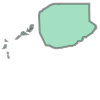

In [16]:
wild_layer

In [17]:
school_layer = geom.MultiPoint([pt for pt in schools['shapes']])

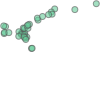

In [18]:
school_layer

In [19]:
wild_schools = school_layer.intersection(wild_layer)

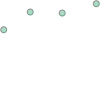

In [20]:
wild_schools

This works alright if we're only concerned about the shape. But, we have these attached pieces of data in the `pandas` dataframe! So, doing it this way, while it makes sense, would mean you'd have to link everything back to the data at the end. That's not something I want to deal with. 

Instead, we've learned that doing different kinds of filtering operations on `pandas` dataframes is fairly easy. So, if we wanted to use the `pandas` dataframe filters to do this, we could. To make it, we would iterate through the schools, then check if that school intersects any wild lands.

In [21]:
filt = [False] * len(schools)
for school, s_idx in zip(schools['shapes'], schools.index):
    for wild in wilds['shapes']:
        filt[s_idx] = filt[s_idx] or wild.contains(school)

In [22]:
schools[filt]

,id,name,shapes
17,15,Folsom High School,POINT (-121.1933329585574 38.77916845682399)
30,26,El Dorado High School,POINT (-120.5548864058656 38.96114628280215)
31,27,Truckee High School,POINT (-120.1828491519764 39.06322967563761)
32,27,Nevada Union High School,POINT (-120.9042384613469 38.9724888820061)


We'll talk about how to output to shapefiles soon. 

### Problem: Too Much Sacramento

Our sacramento dataset is too big. Let's clip the employment regions by the boundaries, and then find schools in the new area. That is, 

1. Clip `social` by `boundaries`
2. Search for `schools` within polygons of `social` like in the above example and store it in a new dataframe, `clipped_social`

Before you start, it'll be good to know that you can create a copy of a `pandas` dataframe using the `.copy()` method:

In [42]:
work = schools.copy()

Now, experiment on work to complete the problem.

### Example: Kinda-Wild Schools

So, let's say our vendor acknolwedges that maybe finding schools exactly inside of wilderness areas may not be helpful, and now wants us to look within some space of the wilderness area. Since we're working in raw latitude & longitude, let's just use a .05 degree buffer. 

In [23]:
schools['buffer'] = pandas.Series(s.buffer(.05) for s in schools['shapes'])

Then, we're just looking for places where this buffer intersects a wildlands, so the code we wrote above looking beween schools and wildlands could be used! However, now we're not interested in the case when a wildlands *contains* a school, just *intersects* a school buffer!

In [24]:
filt = [False] * len(schools)
for school, s_idx in zip(schools['buffer'], schools.index):
    for wild in wilds['shapes']:
        filt[s_idx] = filt[s_idx] or wild.intersects(school) #changed

In [25]:
schools[filt]

,id,name,shapes,buffer
1,1,California Middle School,POINT (-121.4865391479792 38.54749586808352),POLYGON ((-121.4365391479792 38.54749586808352...
5,5,Washington Unified,POINT (-121.5253875502527 38.57698662601376),POLYGON ((-121.4753875502527 38.57698662601376...
11,9,John F. Kennedy High School,POINT (-121.5279396350736 38.49872269150657),POLYGON ((-121.4779396350736 38.49872269150657...
17,15,Folsom High School,POINT (-121.1933329585574 38.77916845682399),POLYGON ((-121.1433329585574 38.77916845682399...
18,16,Vista Del Lago High School,POINT (-121.2046755577613 38.81262912447561),POLYGON ((-121.1546755577613 38.81262912447561...
19,16,Oak Ridge High School,POINT (-121.1156361540104 38.84155275244566),POLYGON ((-121.0656361540104 38.84155275244566...
20,17,American River College,POINT (-121.3430552680494 38.70600869195858),POLYGON ((-121.2930552680494 38.70600869195858...
21,17,Twin Rivers Administration,POINT (-121.3827543652632 38.67821932390893),POLYGON ((-121.3327543652632 38.67821932390893...
22,18,Highlands High School,POINT (-121.367867203808 38.69459520150961),"POLYGON ((-121.317867203808 38.69459520150961,..."
30,26,El Dorado High School,POINT (-120.5548864058656 38.96114628280215),POLYGON ((-120.5048864058656 38.96114628280215...


Now, that's much more reasonable!

### Output

Well, we've learned how to input shapfiles using pysal, export the shapes from pysal to shapely, and do GIS operations. Now, how do we go back?

Let's work on the clipped Sacramento data we created in **Problem: Too Much Sacramento**. To write out our data, we'll need to write the shapes to a new shapefile and the dataframe to a new dbf file. We could also just output everything as GeoJSON. First, let's cover making these GeoJSON. 

A GeoJSON dictionary has three necessary components, `type`, `geometry`, and `properties`: 

We represent multiple `Features` in a `FeatureCollection`:

If we had the [GeoJSON](https://github.com/frewsxcv/python-geojson) package installed, we could simply build the GeoJSON objects using that package. Instead, we'll build the dictionary raw. 

So, if we wanted to output our "schools" table in geojson, we could do it pretty easily! First, we should probably look at the `.iterrows` method. 

In [26]:
clipped_social.iterrows?

Object `clipped_social.iterrows` not found.


So, we need a dictionary with one key-value pair that is `'feature':'FeatureCollection'`, and another key-value pair that is `'features'` and a list of geojson-encoded features. For any single row, we can build the GeoJSON feature simply by following the specification above. But, of course, we need to figure out what to put in the `???`

Then, we would add each of these completed features to the list `features` in some `FeatureCollection`.

In the cells below, I build the GeoJSON feature collection by replacing the ??? with relevant traits from our objects:

In [28]:
d = {'type':'FeatureCollection', 'features':[]}

In [33]:
for entry in clipped_social.iterrows():
    row = entry[1]
    feature = {'type':'Feature'}
    feature.update({'geometry':
                    {'type': row['shapes'].type,
                     'coordinates': list(test.xy)}})
    feature.update({'properties':{field:row[field] for field in row.keys() if field != 'shapes'}}) #note Keys, not Columns
    d['features'].append(feature)

In [ ]:
d

For the first blank we were looking for, "type", we need to just understand that any `shapely` shape has a `type` attribute that will tell if the shape is a point, line, polygon, etc.

For the second blank, we just have to know that each points in `shapely` have an `xy` attribute that records the points' coordinates. 

For the third blank, we are using a dictionary comprehension! We know that the properties of a feature is a dictionary where the key is the column name in our table and the value is the actual value of the row cell. So, we can use the dict comprehension to grab each field name and field value for the row we're iterating through. But, we don't want to store the shape's dimensions twice, so we avoid storing the `shapes` column. 

Again, the GeoJSON package removes some of this plumbing, but you would still have to understand how to build the GeoJSON feature collection!

To export to a shapefile, we'd just do the reverse operations of what we did to build our `pandas` table!

First, let's write the shapefile. To do this, we open our new file in `'w'` mode. Then, we'll peel off the `shapes` series and write each shape to our new file. 

First, though, we'll have to convert shapely shapes back to pysal shapes. This is very simple, as the `pysal.cg.shapes.asShape` function is designed to read and interpret structure as spatial data. 

In [34]:
newshp = pysal.open('./sacramento/newsac.shp', 'w')

In [35]:
for element in clipped_social['shapes']:
    outpoly = pysal.cg.shapes.asShape(element)
    newshp.write(outpoly)

In [36]:
newshp.close()

It's that simple to write the shapefile.

Unfortunately, writing the dbf file is more complicated. We'd have to define a specification for the dataframe, set up the header, and then write the rows. The code to do this isn't **that** difficult, but it requires you to understand valid dbf specification types. So, let's look at the code in the [GeoDa Sandbox](https://github.com/GeoDaSandbox/sandbox/blob/master/pyGDsandbox/dataIO.py#L16), written by Daniel Arribas-Bel.

We can just pull this code down.

In [37]:
def df2dbf(df, dbf_path, my_specs=None):
    '''
    Convert a pandas.DataFrame into a dbf.
    __author__ = "Dani Arribas-Bel <darribas@asu.edu> "
    ...
    Arguments
    ---------
    df        : DataFrame
                Pandas dataframe object to be entirely written out to a dbf
    dbf_path  : str
                Path to the output dbf. It is also returned by the function
    my_specs  : list
                List with the field_specs to use for each column.
                Defaults to None and applies the following scheme:
                    * int: ('N', 14, 0)
                    * float: ('N', 14, 14)
                    * str: ('C', 14, 0)
    '''
    if my_specs:
        specs = my_specs
    else:
        type2spec = {int: ('N', 20, 0),
        numpy.int64: ('N', 20, 0),
        float: ('N', 36, 15),
        numpy.float64: ('N', 36, 15),
        str: ('C', 14, 0)
        }
        types = [type(df[i].iloc[0]) for i in df.columns]
        specs = [type2spec[t] for t in types]
    db = pysal.open(dbf_path, 'w')
    db.header = list(df.columns)
    db.field_spec = specs
    for i, row in df.T.iteritems():
        db.write(row)
    db.close()
    return dbf_path

And, using this, we can write our data. I'd also recommend not writing the 'shapes' column, as it's already contained in the shapefile. 

In [41]:
df2dbf(clipped_social.drop(['shapes' ,'schools'], axis=1), './sacramento/newsac.dbf')

'./sacramento/newsac.dbf'

And this is how you would write from a pandas dataframe + shapely objects back to shapefile. 